Title : Data Cleansing for APP Training

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Memuat DataSets

In [2]:
df = pd.read_csv("C:/Users/ASUS/JupyterNotebookFile/RaHciFinaltask/POS_CASH_balance.csv") # load dataset dari direktori file laptop

In [3]:
df.head() #menampilkan 5 data teratas

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


# Exploratory Data Analysis (EDA)

Disini kita pakai **pd.set_option('display.max_columns', None)** untuk menunjukkan semua kolom yang terdapat pada dataset

In [4]:
pd.set_option('display.max_columns', None) #meanmpilkan semua kolom pada data
display(df.head(5)) # 5 data teratas menggunakan display agar tetap bisa ditampilkan, karena line berikutnya mengeksekusi perintah print
print(f'Ukuran dari dataset (baris, kolom) : {df.shape}')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


Ukuran dari dataset (baris, kolom) : (10001358, 8)


## Tipe Data pada DataSet

In [5]:
df.info() #menampilkan tipe dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


Dari sini kita bisa tahu bahwa terdapat 65 kolom bertipe Float, tipe int ada 41 dan objet 16

Dari hal ini untuk menampilkan deskriptif statistiknya ada 2 janis, yaitu yang enampilkan untuk tipe numerik dan obej

### Deskriptif statistik Numerik

In [6]:
df.describe() #ini untuk numerical

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


### Deskriptif Statistik Kategorial

In [7]:
tipe_data_kategorial = df.select_dtypes(include='object') #memilih tipe data objek
tipe_data_kategorial.describe()

,NAME_CONTRACT_STATUS
count,10001358
unique,9
top,Active
freq,9151119


# Data Cleansing

## Mengecek Nilai Duplikasi

In [8]:
df.duplicated().sum() #mennjumlahkan data yang memiliki nilai duplikasi

0

Dari pengecekan nilai duplikasi diatas, menunjukkan bahawa tidak ada data yang duplikasi, Selanjutkan kita lanjutkan untuk pengecekan Missing Value

## Missing Value

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def pengecekan(data):
    pd.set_option('display.max_rows', None)
    missing_values = data.isna().sum()
    missing_columns = missing_values[missing_values > 0]
    if not missing_columns.empty:
        persentase = missing_columns / len(data) * 100
        print(f'Kolom dengan Missing Value :')
        missing_info = pd.DataFrame({'Missing Values': missing_columns, 'Persentase': persentase})
        missing_info = missing_info.sort_values(by='Missing Values', ascending=False)
        missing_info.info()
        
        # Visualisasi
        plt.figure(figsize=(12, 9))
        colors = []
        for persen in missing_info['Persentase']:
            if persen > 51:
                colors.append('#E1341E')  # Merah
            elif persen > 41:
                colors.append('#FFA500')  # Orange
            elif persen > 21:
                colors.append('#FFFF00')  # Kuning
            else:
                colors.append('#2CA02C')  # Hijau
        ax = sns.barplot(x='Persentase', y=missing_info.index, data=missing_info, palette=colors)

        for p in ax.patches:
            ax.annotate("%.2f" % p.get_width() + '%', xy=(p.get_width(), p.get_y()+p.get_height()/2),
                        xytext=(8, 0), textcoords='offset points', ha="left", va="center", fontsize=10)

        plt.title('Persentase Missing Value untuk Setiap Kolom', fontsize=10)
        plt.xlabel('Persentase Missing Value', fontsize=12)
        plt.ylabel('Nama_kolom', fontsize=12)
        
        # Menambahkan legenda
        legend_labels = ['> 51%', '31% - 51%', '21% - 31%', '< 21%']
        legend_colors = ['#E1341E', '#FFA500', '#FFFF00', '#2CA02C']
        patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='none') for color in legend_colors]
        plt.legend(patches, legend_labels, loc='lower right')
        
        plt.tight_layout()
        plt.xlim(0, 100)
        plt.show()
        
    else:
        print("Tidak ada kolom dengan Missing Value.")

Kolom dengan Missing Value :
<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, CNT_INSTALMENT_FUTURE to CNT_INSTALMENT
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Missing Values  2 non-null      int64  
 1   Persentase      2 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 48.0+ bytes


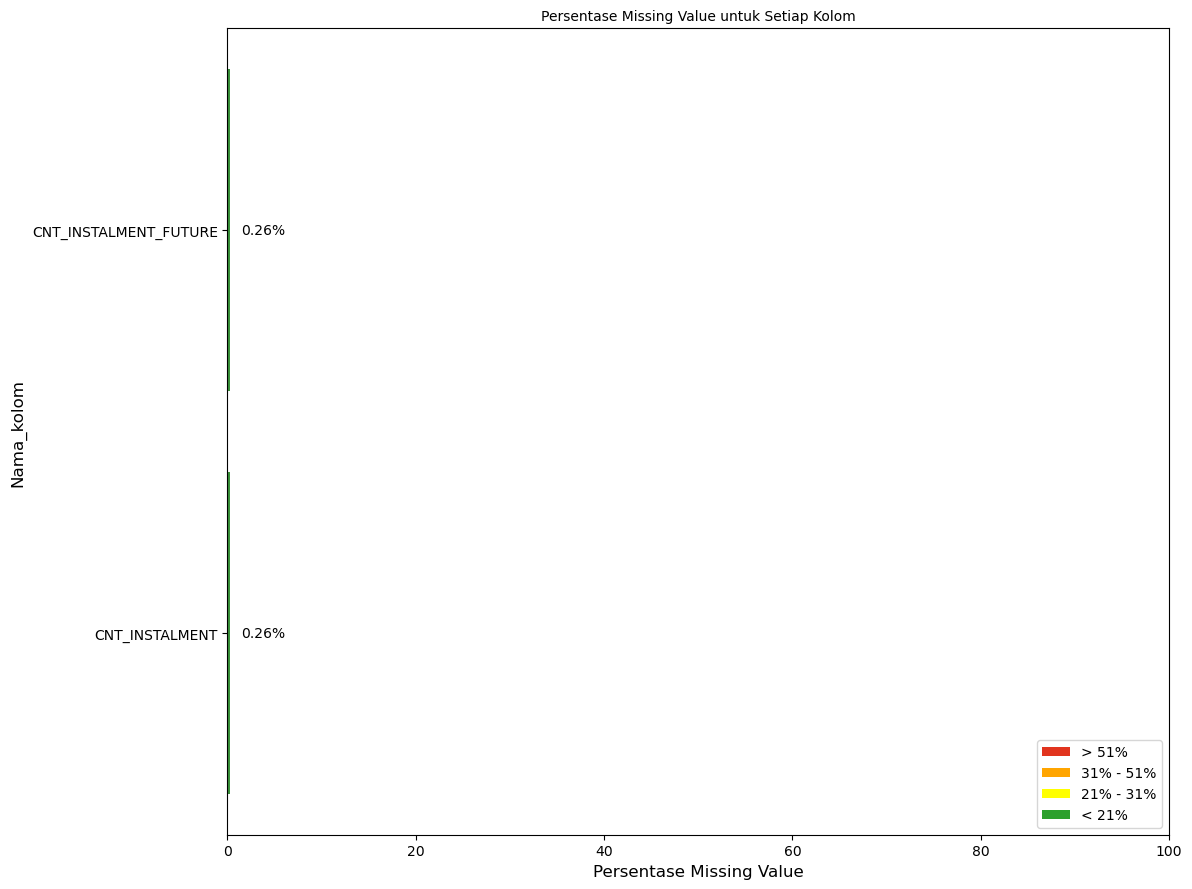

In [10]:
pengecekan(df)

Hasil diatas menunjukkan bahwa, hampir dari separuh data memiliki nilai hilang yang melebihi 50%. Untuk keputusan saya ini, saya mengamil tindakan untuk mengapus kolom yang memliki nilai missing value diatas 45%. Karena jika kita isi dengan nilai 0 atau mean, kemungkinan besar hasilnya akan tidak akurat dan bisa bikin data jadi kelihatan janggal

# Menghapus Kolom Diatas 45%

In [11]:
# Menghitung persentase missing value untuk setiap kolom
persentase_missing = (df.isnull().sum() / len(df)) * 100

# Membuat list nama kolom yang akan dihapus
kolom_hapus = persentase_missing[persentase_missing > 45].index.tolist()

# Menghapus kolom dari dataset
data_POS_CASH_balance_clean = df.drop(columns=kolom_hapus)

In [12]:
data_POS_CASH_balance_clean.shape

(10001358, 8)

In [13]:
data_POS_CASH_balance_clean.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


# Mengisi Missing Value 

Kolom dengan Missing Value :
<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, CNT_INSTALMENT_FUTURE to CNT_INSTALMENT
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Missing Values  2 non-null      int64  
 1   Persentase      2 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 48.0+ bytes


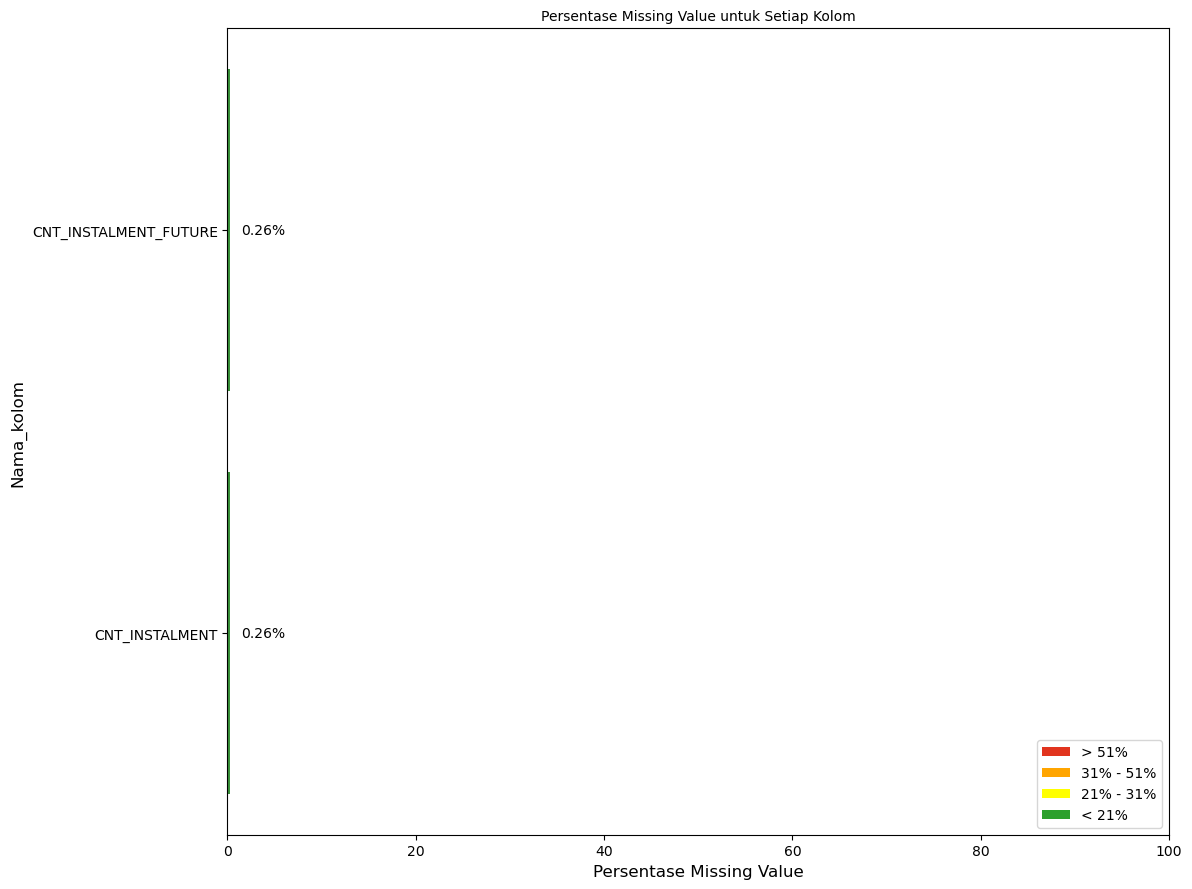

In [14]:
pengecekan(data_POS_CASH_balance_clean)

In [15]:
def isi_missing_value(data):
    # Mengisi nilai missing value untuk kolom numerik dengan rata-rata
    for kolom in data.select_dtypes(include='number').columns:
        mean_value = data[kolom].mean()
        data[kolom].fillna(mean_value, inplace=True)

    # Mengisi nilai missing value untuk kolom objek dengan mode
    for kolom in data.select_dtypes(include='object').columns:
        mode_value = data[kolom].mode()[0]
        data[kolom].fillna(mode_value, inplace=True)

    return data

# Contoh penggunaan:
data_clean = isi_missing_value(data_POS_CASH_balance_clean)

In [16]:
pengecekan(data_POS_CASH_balance_clean)

Tidak ada kolom dengan Missing Value.


# Menyimpan Data

In [17]:
data_clean.to_csv('data_clean_data_POS_CASH_balance_clean.csv', index=False)